# Tutorial Exercises I

At the start of this section, we introduced three examples:
<ul>
    <li> a fair coin is tossed 10 times. How likely is it that we obtain exactly 5 heads?
    <li> a fair six sided dice is rolled 3 times. How likely is it that we obtain two or more sixes?
    <li> a blind man guesses whether a symbol on a screen is an X or an O. How likely is it that he guesses correctly at least 22 out of 30 times?
</ul>        


In each case there is an event with two possible outcomes.

One outcome (the one we are looking for) is designated as a "hit" whilst the other is called a "miss".

The probability of a hit is a fixed value (<i>p</i>)

The event is repeated a certain number of times (<i>n</i>) and we count the number of times (<i>k</i>) one of the outcomes occurs

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/BinomialTable.png" width="100%"  />

So far we have considered the coin toss example. Can we adapt the code to simulte the dice roll example and the blindsight example?


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas
import seaborn as sns
sns.set_theme() # use pretty defaults

## Dice roll example

In the code block below I have copied the complete code to simulate 10 coin tosses for 10,000 repeats, plot the proportion of repeats on which each value of k was obtained, and plot the expected distribution from the equation

Can you modify the code to simulate the dice roll example from the table above?

You will need to change the values of $p$ and $n$, and the $x$-axis label for the histogram

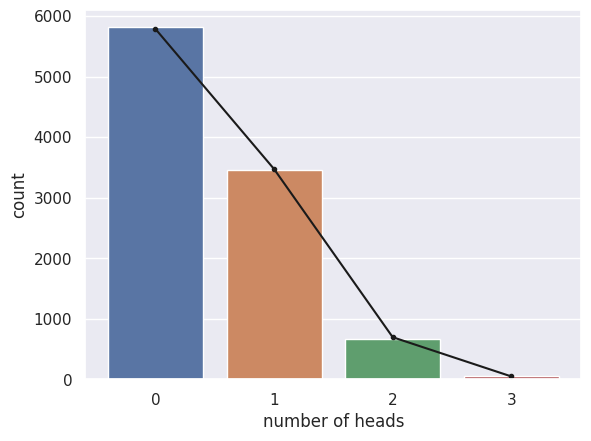

In [2]:
n=3
p=1/6

nReps = 10000
k = np.empty(nReps)

for i in np.arange(len(k)): # we are going to simlulte 10,000 repeats of 10 coin tosses
    k[i] = np.random.binomial(n,p)

sns.countplot(x=k, order=range(n+1))
plt.xlabel('number of heads')

# add the expected distribution
p_k = stats.binom.pmf(range(n+1),n,p)
freq = p_k * nReps
plt.plot(range(n+1),freq, 'k.-')

plt.show()

The question asks you to work out the probability of obtaining 2 or more sixes out of three dice rolls.

Work this out based on
<ul>
<li> The function <tt>stats.binom.cdf()</tt>
<li> The simulation
</ul>

Hopefully the answers should match quite closely!

In [7]:
# Your code here to work out p(k>=2) using stats.binom.cdf

1-stats.binom.cdf(1,n,p)

0.07407407407407407

In [19]:
# Your code here to count the proportion of times k>=2 in the simulated dataset

(sum(k==2)+sum(k==3))/nReps

0.0731

## Blindsight example

Warrington and Weiskrantz (1974) worked with a patient (called in their work by his initials, DB). DB had damage to the visual cortex of his brain, and reported no conscious vision, but Warrington and Weiskrantz noticed some hints that he could react to visual stimuli even though he was unaware of them, so they set up the following experiment:

Symbols are presented on a screen - 50% of symbols are X's and 50% are O's The patient guesses whether each symbol is an X or an O

If the patient gives the correct answer much more often than we would expect if he were guessing, we conclude that he has some redisual (unconsicous) vision

DB guessed correctly on 22 out of 30 trials. What can we conclude?
Simulate the null hypothesis

Our 'null' hypothesis is the baseline against which we test our evidence. In this case, the null hypothesis is that DB was guessing and this would translate to a value for p of 0.5

So we work out how likely it was to get 22 or more trials out of 30 correct given p=0.5, and this tells us how likely it was that the data could have arisen under the null hypothesis

<ul>
    <li>Why 22 or more?
    <li>We would conclude that DB was not guessing if he got an unusually high number of trials correct. We need to determine a cutoff such that if he scored more than the cut-off, we would conclude he had some residual unconscious vision. It is logical that if 22/30 trials correct is sufficient evidence to reject the null, so is 23/30 and 24/30...
</ul>
        
Copy the code from above for simulating the binomial distribution and work through modifying it to obtain the probability of 22/30 correct trials if DB was really guessing


In [20]:
# Your code here to work out p(k>=22) using stats.binom.cdf
1-stats.binom.cdf(21,30,0.5)

0.008062400855123997

0.0082

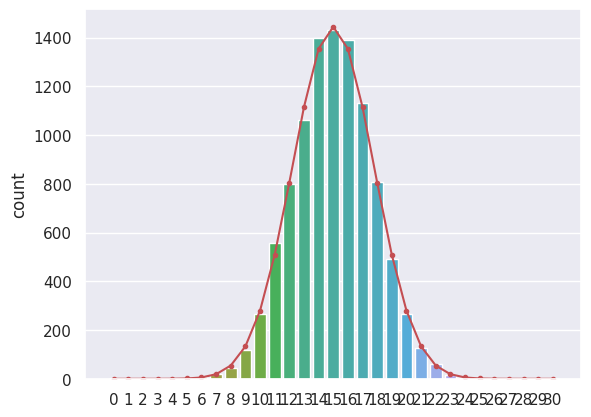

In [43]:
# Your code here to count the proportion of times k>=22 in the simulated dataset

n=30
p=0.5

nReps=10000
k=np.empty(nReps)

for i in np.arange(len(k)):
  k[i]=np.random.binomial(n,p)

sns.countplot(x=k, order=range(31))

#expected distribution
p_k=stats.binom.pmf(range(n+1),30,0.5)
freq_k=p_k*nReps
plt.plot(range(n+1),freq_k, 'r.-')


#Actually counting:
sum(k>21)/nReps

If you run the simulation a few times you will notice that the proportion of trials on which k>=22 in the simulation is quite unstable

Even though 10000 reps seems like a lot, and gives you a nice smooth histogram, we are counting the instances of a very rare event - you expect about 80 cases out of 10,000 in which DB gets 22/30 due to chance, but you might sometimes see 70 or 90 such cases, a variation of 10%.

This suggests you should increase nReps to get a stable estimate of how unlikely k>=22 is based on simulation

In future we may use simulation to estimate the probability of an event where there is no equation to tell us the 'correct' probability - so we will need our simulation to give a reliable answer. Bearing in mind that we are often interested in events that would happen only rarely due to chance, it is often necessary to use a large number of repetitions in the simulation. Fortunately computers are fast these days!